# Import Packages

In [1]:
import utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import time
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


In [2]:
# Import data
submission = pd.read_csv(
    f'{utils.get_m5_root_dir()}/data/input/sample_submission.csv')
df_merged = pd.read_csv(
    f'{utils.get_m5_root_dir()}/data/preprocessed/tx2_hobbies_1year.csv')


In [3]:
# take only values where target value is known
df_merged = df_merged.loc[df_merged['data_type']== 'train']

In [4]:
# extract target values in seperate list 
y_test = df_merged[(df_merged['date'] > '2016-03-27')]['sale']

In [5]:
# replace target values in DataFrame with NaN
df_merged['sale'].loc[df_merged['date'] > '2016-03-27'] = np.nan

In [6]:
# downcast numerical values to reduce mem usage
df_merged = utils.reduce_mem_usage(df_merged)

Mem. usage of decreased to 25.51 Mb (32.8% reduction)


In [7]:
df_merged

,id,item_id,dept_id,cat_id,store_id,state_id,d,sale,date,wm_yr_wk,...,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,data_type
0,HOBBIES_1_001_TX_2_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,TX_2,TX,d_1547,0.0,2015-04-24,11512,...,2015,NaN,NaN,NaN,NaN,0,0,0,8.26,train
1,HOBBIES_1_002_TX_2_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,TX_2,TX,d_1547,1.0,2015-04-24,11512,...,2015,NaN,NaN,NaN,NaN,0,0,0,3.97,train
2,HOBBIES_1_003_TX_2_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,TX_2,TX,d_1547,0.0,2015-04-24,11512,...,2015,NaN,NaN,NaN,NaN,0,0,0,2.97,train
3,HOBBIES_1_004_TX_2_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,TX_2,TX,d_1547,0.0,2015-04-24,11512,...,2015,NaN,NaN,NaN,NaN,0,0,0,4.64,train
4,HOBBIES_1_005_TX_2_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,TX_2,TX,d_1547,0.0,2015-04-24,11512,...,2015,NaN,NaN,NaN,NaN,0,0,0,2.73,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207350,HOBBIES_2_145_TX_2_validation,HOBBIES_2_145,HOBBIES_2,HOBBIES,TX_2,TX,d_1913,NaN,2016-04-24,11613,...,2016,NaN,NaN,NaN,NaN,0,0,0,2.88,train
207351,HOBBIES_2_146_TX_2_validation,HOBBIES_2_146,HOBBIES_2,HOBBIES,TX_2,TX,d_1913,NaN,2016-04-24,11613,...,2016,NaN,NaN,NaN,NaN,0,0,0,1.97,train
207352,HOBBIES_2_147_TX_2_validation,HOBBIES_2_147,HOBBIES_2,HOBBIES,TX_2,TX,d_1913,NaN,2016-04-24,11613,...,2016,NaN,NaN,NaN,NaN,0,0,0,0.97,train
207353,HOBBIES_2_148_TX_2_validation,HOBBIES_2_148,HOBBIES_2,HOBBIES,TX_2,TX,d_1913,NaN,2016-04-24,11613,...,2016,NaN,NaN,NaN,NaN,0,0,0,0.88,train


In [8]:
def encode_categorical(df, cols, fillna=False):
    for col in cols:
        encoder = LabelEncoder()
        df[col] = encoder.fit_transform(
            df[col].fillna("MISSING") if fillna else df[col])
    return df


df_merged = encode_categorical(
    df_merged,
    [
        "item_id", "dept_id", "cat_id", "store_id", "state_id", "event_name_1",
        "event_type_1", "event_name_2", "event_type_2",'d'
    ],
    fillna=True,
).pipe(utils.reduce_mem_usage)

df_merged

Mem. usage of decreased to 13.64 Mb (28.9% reduction)


,id,item_id,dept_id,cat_id,store_id,state_id,d,sale,date,wm_yr_wk,...,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,sell_price,data_type
0,HOBBIES_1_001_TX_2_validation,0,0,0,0,0,0,0.0,2015-04-24,11512,...,2015,13,1,0,0,0,0,0,8.26,train
1,HOBBIES_1_002_TX_2_validation,1,0,0,0,0,0,1.0,2015-04-24,11512,...,2015,13,1,0,0,0,0,0,3.97,train
2,HOBBIES_1_003_TX_2_validation,2,0,0,0,0,0,0.0,2015-04-24,11512,...,2015,13,1,0,0,0,0,0,2.97,train
3,HOBBIES_1_004_TX_2_validation,3,0,0,0,0,0,0.0,2015-04-24,11512,...,2015,13,1,0,0,0,0,0,4.64,train
4,HOBBIES_1_005_TX_2_validation,4,0,0,0,0,0,0.0,2015-04-24,11512,...,2015,13,1,0,0,0,0,0,2.73,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207350,HOBBIES_2_145_TX_2_validation,560,1,0,0,0,366,NaN,2016-04-24,11613,...,2016,13,1,0,0,0,0,0,2.88,train
207351,HOBBIES_2_146_TX_2_validation,561,1,0,0,0,366,NaN,2016-04-24,11613,...,2016,13,1,0,0,0,0,0,1.97,train
207352,HOBBIES_2_147_TX_2_validation,562,1,0,0,0,366,NaN,2016-04-24,11613,...,2016,13,1,0,0,0,0,0,0.97,train
207353,HOBBIES_2_148_TX_2_validation,563,1,0,0,0,366,NaN,2016-04-24,11613,...,2016,13,1,0,0,0,0,0,0.88,train


In [9]:
# feature engineering: sale

# rolling mean and rolling std (weekly, monthly, quarterly, and half-year)

df_merged['rolling_mean_t7'] = df_merged.groupby(
    ['id'])['sale'].transform(lambda x: x.shift(28).rolling(7).mean())

df_merged['rolling_std_t7'] = df_merged.groupby(
    ['id'])['sale'].transform(lambda x: x.shift(28).rolling(7).std())

df_merged['rolling_mean_t30'] = df_merged.groupby(
    ['id'])['sale'].transform(lambda x: x.shift(28).rolling(30).mean())

df_merged['rolling_std_t30'] = df_merged.groupby(
    ['id'])['sale'].transform(lambda x: x.shift(28).rolling(30).std())

# laged values
df_merged['lag_t7'] = df_merged.groupby(
    ['id'])['sale'].transform(lambda x: x.shift(7))

df_merged['lag_t30'] = df_merged.groupby(
    ['id'])['sale'].transform(lambda x: x.shift(30))



In [10]:
# feature engineering price
df_merged['lag_price_t1'] = df_merged.groupby(
    ['id'])['sell_price'].transform(lambda x: x.shift(1))

df_merged['rolling_price_max_t30'] = df_merged.groupby(
    ['id'])['sell_price'].transform(lambda x: x.shift(1).rolling(30).max())

df_merged['price_change_t1'] = (df_merged['lag_price_t1'] -
                                df_merged['sell_price']) / (
                                    df_merged['lag_price_t1'])

df_merged['price_change_t30'] = (df_merged['rolling_price_max_t30'] -
                                  df_merged['sell_price']) / (
                                      df_merged['rolling_price_max_t30'])

df_merged['rolling_price_std_t7'] = df_merged.groupby(
    ['id'])['sell_price'].transform(lambda x: x.rolling(7).std())

df_merged['rolling_price_std_t30'] = df_merged.groupby(
    ['id'])['sell_price'].transform(lambda x: x.rolling(30).std())

df_merged.drop(['rolling_price_max_t30', 'lag_price_t1'],
               inplace=True,
               axis=1)

In [11]:
# relevant feature
# TODO: proper feature selection (e.g. random forrest)

features = [
    'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'year', 'month',
    'wday', 'event_name_1', 'event_type_1', 'event_name_2',
    'event_type_2', 'snap_CA', 'snap_TX', 'snap_WI', 'sell_price',
    'lag_t30', 'rolling_mean_t7', 'rolling_std_t7',
    'rolling_mean_t30',
    'rolling_std_t30', 'price_change_t1',
    'rolling_price_std_t7', 'rolling_price_std_t30',
    
]


In [12]:
# drop lines with missing values that occur due to feature engineering
df_merged = df_merged.dropna(subset = features)
df_merged

,id,item_id,dept_id,cat_id,store_id,state_id,d,sale,date,wm_yr_wk,...,rolling_mean_t7,rolling_std_t7,rolling_mean_t30,rolling_std_t30,lag_t7,lag_t30,price_change_t1,price_change_t30,rolling_price_std_t7,rolling_price_std_t30
32205,HOBBIES_1_001_TX_2_validation,0,0,0,0,0,57,2.0,2015-06-20,11521,...,0.428571,5.345225e-01,0.633333,0.808717,2.0,0.0,0.0,0.0,0.0,0.0
32206,HOBBIES_1_002_TX_2_validation,1,0,0,0,0,57,0.0,2015-06-20,11521,...,0.142857,3.779645e-01,0.300000,0.534983,0.0,0.0,0.0,0.0,0.0,0.0
32207,HOBBIES_1_003_TX_2_validation,2,0,0,0,0,57,0.0,2015-06-20,11521,...,0.000000,4.301595e-09,0.100000,0.305129,0.0,0.0,0.0,0.0,0.0,0.0
32208,HOBBIES_1_004_TX_2_validation,3,0,0,0,0,57,0.0,2015-06-20,11521,...,0.000000,0.000000e+00,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
32209,HOBBIES_1_005_TX_2_validation,4,0,0,0,0,57,0.0,2015-06-20,11521,...,0.285714,4.879500e-01,0.433333,0.678911,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207350,HOBBIES_2_145_TX_2_validation,560,1,0,0,0,366,NaN,2016-04-24,11613,...,0.000000,0.000000e+00,0.366667,0.668675,NaN,0.0,0.0,0.0,0.0,0.0
207351,HOBBIES_2_146_TX_2_validation,561,1,0,0,0,366,NaN,2016-04-24,11613,...,0.428571,7.867958e-01,0.366667,0.556053,NaN,0.0,0.0,0.0,0.0,0.0
207352,HOBBIES_2_147_TX_2_validation,562,1,0,0,0,366,NaN,2016-04-24,11613,...,0.571429,5.345225e-01,0.600000,0.932183,NaN,1.0,0.0,0.0,0.0,0.0
207353,HOBBIES_2_148_TX_2_validation,563,1,0,0,0,366,NaN,2016-04-24,11613,...,0.000000,0.000000e+00,0.100000,0.402578,NaN,0.0,0.0,0.0,0.0,0.0


In [13]:
x_train = df_merged[df_merged['date'] <= '2016-03-27'][features]
y_train = df_merged[df_merged['date'] <= '2016-03-27']['sale']
x_val = df_merged[(df_merged['date'] > '2016-03-27')][features]
y_val = y_test

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(159266, 24)
(159266,)
(15820, 24)
(15820,)


In [14]:
# docu of classifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

n_estimators = 50

clf = GradientBoostingRegressor(n_estimators=n_estimators)
clf = clf.fit(x_train, y_train)


In [15]:
# R-Squared value
clf.score(x_val, y_val)

0.2579592304478582

In [16]:
y_pred = clf.predict(x_val)

In [17]:
# MSE of computed forecasts
mean_squared_error(y_val, y_pred)

2.132646217969627

In [18]:
# MSE when prediction always zero
mean_squared_error(y_val, np.repeat(0,len(y_pred)))


3.327054361567636

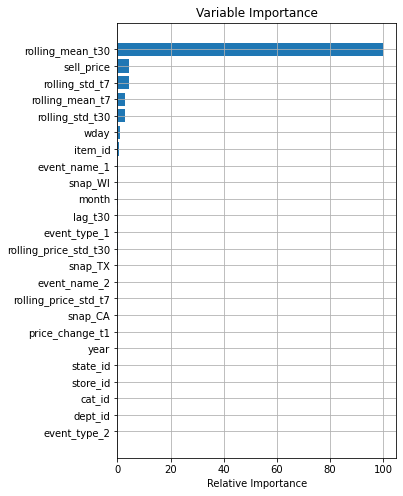

In [19]:
# Plot feature importance
feature_importance = clf.feature_importances_

feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(5,8))
plt.grid()
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, x_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

Text(0, 0.5, 'Deviance')

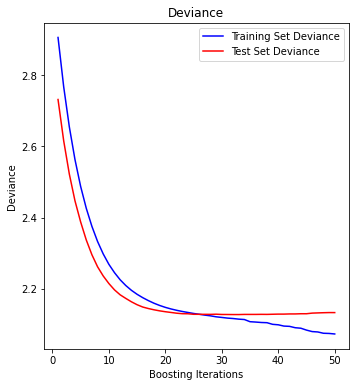

In [20]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((n_estimators,), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(x_val)):
    test_score[i] = clf.loss_(y_val, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(n_estimators) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(n_estimators) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [21]:
fc = x_val
fc['y_pred'] = y_pred
fc['y_true'] = y_test
fc

,item_id,dept_id,cat_id,store_id,state_id,year,month,wday,event_name_1,event_type_1,...,lag_t30,rolling_mean_t7,rolling_std_t7,rolling_mean_t30,rolling_std_t30,price_change_t1,rolling_price_std_t7,rolling_price_std_t30,y_pred,y_true
191535,0,0,0,0,0,2016,3,3,13,1,...,1.0,0.285714,0.487950,0.533333,1.166585,0.0,0.0,0.0,0.469614,0.0
191536,1,0,0,0,0,2016,3,3,13,1,...,0.0,0.285714,0.755929,0.100000,0.402578,0.0,0.0,0.0,0.183483,0.0
191537,2,0,0,0,0,2016,3,3,13,1,...,0.0,0.000000,0.000000,0.066667,0.253708,0.0,0.0,0.0,0.173331,0.0
191538,3,0,0,0,0,2016,3,3,13,1,...,3.0,0.857143,1.214986,1.233333,1.633345,0.0,0.0,0.0,1.020003,0.0
191539,4,0,0,0,0,2016,3,3,13,1,...,0.0,0.142857,0.377964,0.400000,0.621455,0.0,0.0,0.0,0.398645,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207350,560,1,0,0,0,2016,4,2,13,1,...,0.0,0.000000,0.000000,0.366667,0.668675,0.0,0.0,0.0,0.413578,0.0
207351,561,1,0,0,0,2016,4,2,13,1,...,0.0,0.428571,0.786796,0.366667,0.556053,0.0,0.0,0.0,0.406041,2.0
207352,562,1,0,0,0,2016,4,2,13,1,...,1.0,0.571429,0.534522,0.600000,0.932183,0.0,0.0,0.0,0.641243,0.0
207353,563,1,0,0,0,2016,4,2,13,1,...,0.0,0.000000,0.000000,0.100000,0.402578,0.0,0.0,0.0,0.210694,0.0


$\color{red}{\text{Finding:}}$  
Prediction is almost equivalent to 30-days rolling mean.